**MountainCar-v0**




In [ ]:
!apt-get install -y xvfb
!apt-get install swig

In [ ]:
!pip install pyvirtualdisplay
!pip install gym[box2d]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time
from collections import deque, namedtuple
import math
import gym
import numpy as np
import PIL.Image
import tensorflow as tf
from pyvirtualdisplay import Display
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import imageio
import sys
import IPython
from IPython.display import HTML
from base64 import b64encode
import logging
logging.getLogger().setLevel(logging.ERROR)

In [ ]:
file_directory = "/content/drive/My Drive/Colab Notebooks/reinforcement_projects/Files/course code/jovyan/work"
sys.path.append(file_directory)


In [ ]:
force = 0.001
gravity = 0.0025

In [ ]:
Display(visible=0, size=(840, 480)).start();
tf.random.set_seed(0)

In [ ]:
tf.random.set_seed(1)

-->after it try  bipedal walker or car racing
 [link of mountain car](https://www.gymlibrary.dev/environments/classic_control/mountain_car/)





In [ ]:
env = gym.make('MountainCar-v0')

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


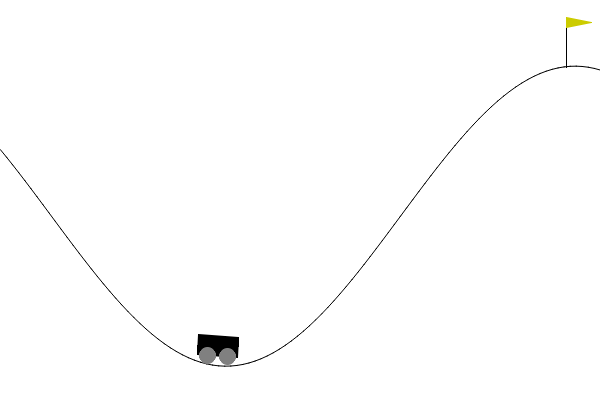

In [ ]:
env.reset()
PIL.Image.fromarray(env.render(mode='rgb_array'))

In [ ]:
state_size = env.observation_space.shape
num_actions = env.action_space.n

print('State Shape:', state_size)
print('Number of actions:', num_actions)

State Shape: (2,)
Number of actions: 3


In [ ]:
# Reset the environment and get the initial state.
current_state = env.reset() #note return state

- state :0 -position ,1-velocity
- action :0-left ,1 :no ,2-right
- velocityt+1 = velocityt + (action - 1) * force - cos(3 * positiont) * gravity
- positiont+1 = positiont + velocityt+1
- The goal is to reach the flag placed on top of the right hill as quickly as possible,
- reward always -1 ,that we want to minimize n step (so if wrong direction will more steps so ok)
- has ranges  : The position is clipped to the range [-1.2, 0.6] and velocity is clipped to the range [-0.07, 0.07] ,velocity at begin always 0
- terminate after max 200 step ,or position >=.5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


step 0: first_state [-0.526431  0.      ] :--> action 0 , next state [-0.5274098  -0.00097876] , reward -1.0 ,isdone False


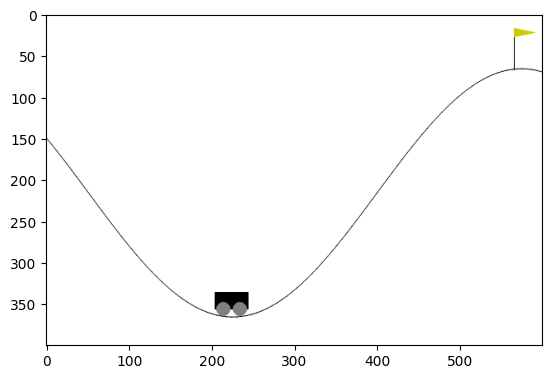

step 1: first_state [-0.5274098  -0.00097876] :--> action 1 , next state [-0.52836    -0.00095018] , reward -1.0 ,isdone False


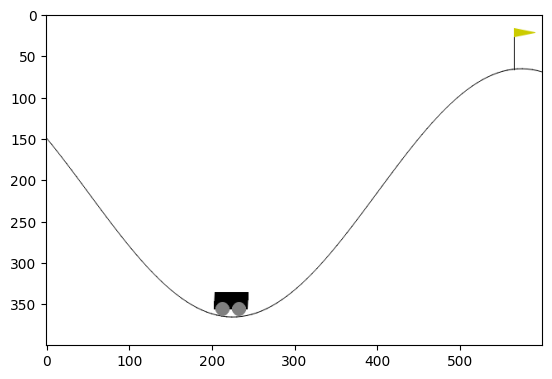

step 2: first_state [-0.52836    -0.00095018] :--> action 2 , next state [-5.2827448e-01  8.5531836e-05] , reward -1.0 ,isdone False


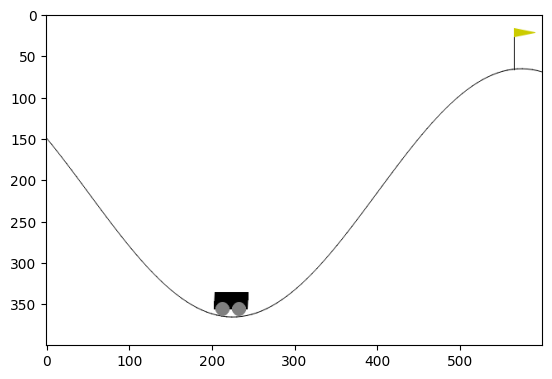

step 3: first_state [-5.2827448e-01  8.5531836e-05] :--> action 2 , next state [-0.52715385  0.0011206 ] , reward -1.0 ,isdone False


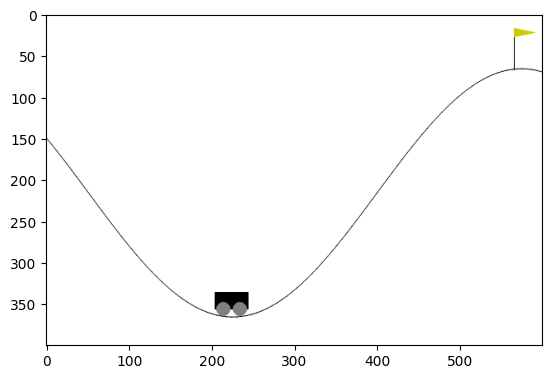

step 4: first_state [-0.52715385  0.0011206 ] :--> action 0 , next state [-5.2700657e-01  1.4726089e-04] , reward -1.0 ,isdone False


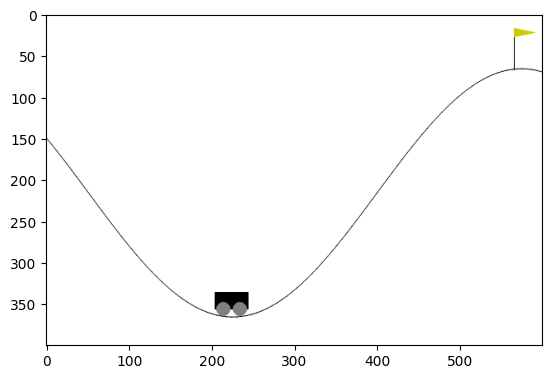

step 5: first_state [-5.2700657e-01  1.4726089e-04] :--> action 1 , next state [-5.268338e-01  1.728191e-04] , reward -1.0 ,isdone False


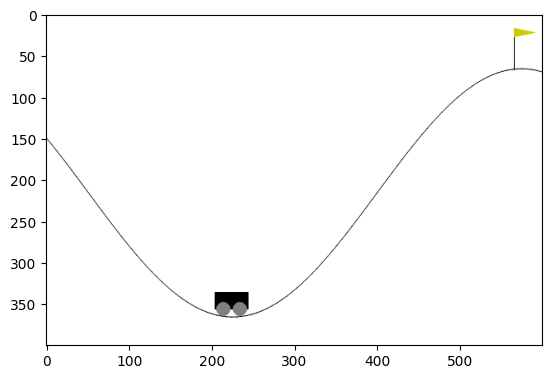

In [ ]:
#some actions to discover environment
current_state = env.reset()
for i,action in enumerate([0,1,2,2,0,1]):
  next_state, reward, done, _ = env.step(action)
  print(f"step {i}: first_state {current_state} :--> action {action} , next state {next_state} , reward {reward} ,isdone {done}")
  current_state=next_state
  img=PIL.Image.fromarray(env.render(mode='rgb_array'))
  plt.imshow(img)
  plt.show()
  time.sleep(1)
#note in this example taking no action changing state as it's value is substituted in velocity/position rule ,logicaly may be
#something like  physics rule :speed will still if no force

In [ ]:
current_state = env.reset()

In [ ]:
## compare next_state by velocity law
action=0
next_state, reward, done, _ = env.step(action)
print(f" first_state {current_state} :--> action {action} , next state {next_state}")


###comparing new state calculated with get from env.step

In [ ]:
velocity_new = current_state[1] + (action - 1) * force - math.cos(3 * current_state[0]) * gravity
position_new = current_state[0] + velocity_new
print(f"{position_new},{velocity_new}")


-0.40289841966120493,-0.0018989034125019382


In [ ]:
for i,action in enumerate([0,1,2,2,0,1]):
  current_state = env.reset()
  next_state, reward, done, _ = env.step(action)
  velocity_new = current_state[1] + (action - 1) * force - math.cos(3 * current_state[0]) * gravity
  position_new = current_state[0] + velocity_new
  print(f" first_state {current_state} :--> action {action} , next state {next_state} ,computed {[position_new,velocity_new]}")
#must be same as from env.step ,it may differ if env.step was started from env action (state 2) and current state was (state 0)
#note : first position can be different ,no problem (from doc)


 first_state [-0.41214484  0.        ] :--> action 0 , next state [-0.41396526 -0.00182042] ,computed [-0.4139652557321161, -0.0018204159684747454]
 first_state [-0.47599366  0.        ] :--> action 1 , next state [-4.7634950e-01 -3.5582588e-04] ,computed [-0.47634948894820445, -0.0003558258756184012]
 first_state [-0.48556077  0.        ] :--> action 2 , next state [-0.48484546  0.00071533] ,computed [-0.48484544104831656, 0.0007153337548450802]
 first_state [-0.56814593  0.        ] :--> action 2 , next state [-0.5668129   0.00133311] ,computed [-0.566812820733104, 0.001333110033955318]
 first_state [-0.4413024  0.       ] :--> action 0 , next state [-0.44291335 -0.00161097] ,computed [-0.4429133604953985, -0.0016109715889195907]
 first_state [-0.43200678  0.        ] :--> action 1 , next state [-0.4326851  -0.00067833] ,computed [-0.4326851046948054, -0.0006783283619501922]


##model

- note calculated position ,velocity must be same as from env.step ,it may differ if env.step was started from env action (state 2) and current state was (state 0)
- note : first position can be different ,no problem (from doc)

## current problem code

In [ ]:
#hyper parameters:
MEMORY_SIZE = 100_000
GAMMA = 0.995
NUM_STEPS_FOR_UPDATE = 4
max_num_timesteps = 1000
num_p_av = 100
E_DECAY = 0.995
E_MIN = 0.01
TAU = 1e-3
MINIBATCH_SIZE = 64
lrn_rate=1e-3
regulize=1
random.seed(0)


In [ ]:
def build_model(state_size, num_actions):
    model = Sequential([
        Input(shape=state_size),
        Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regulize)),
        Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regulize)),
        Dense(units=num_actions, activation='linear')
    ])
    return model

q_network = build_model(state_size, num_actions)
target_q_network = build_model(state_size, num_actions)
optimizer = Adam(learning_rate=lrn_rate)

In [ ]:
experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

In [ ]:
def compute_loss(experiences, gamma, q_network, target_q_network):
    states, actions, rewards, next_states, done_vals = experiences
    max_qsa = tf.reduce_max(target_q_network(next_states), axis=-1)
    y_targets = rewards + (gamma * max_qsa * (1 - done_vals))
    q_values = q_network(states)
    q_values = tf.gather_nd(q_values, tf.stack([tf.range(q_values.shape[0]),
                                                tf.cast(actions, tf.int32)], axis=1))
    loss = MSE(q_values,y_targets)
    return loss

In [ ]:
def sample_Unpack(memory_buffer):
    experiences = random.sample(memory_buffer, k=MINIBATCH_SIZE)
    states = tf.convert_to_tensor(
        np.array([e.state for e in experiences if e is not None]), dtype=tf.float32
    )
    actions = tf.convert_to_tensor(
        np.array([e.action for e in experiences if e is not None]), dtype=tf.float32
    )
    rewards = tf.convert_to_tensor(
        np.array([e.reward for e in experiences if e is not None]), dtype=tf.float32
    )
    next_states = tf.convert_to_tensor(
        np.array([e.next_state for e in experiences if e is not None]), dtype=tf.float32
    )
    done_vals = tf.convert_to_tensor(
        np.array([e.done for e in experiences if e is not None]).astype(np.uint8),
        dtype=tf.float32,
    )
    return (states, actions, rewards, next_states, done_vals)

def get_action(q_values, epsilon=0.0):
    if random.random() > epsilon:
        return np.argmax(q_values.numpy()[0])
    else:
        return random.choice(np.arange(num_actions))

In [ ]:
start = time.time()
total_point_history = []
def getModel(num_episodes):
    epsilon = 1.0
    start = time.time()
    memory_buffer = deque(maxlen=MEMORY_SIZE)
    target_q_network.set_weights(q_network.get_weights())
    for i in range(num_episodes):
              state = env.reset()
              total_points = 0
              for t in range(200):
                  state_qn = np.expand_dims(state, axis=0)
                  q_values = q_network(state_qn)
                  action = get_action(q_values, epsilon)
                  next_state, reward, done, _ = env.step(action)
                  memory_buffer.append(experience(state, action, reward, next_state, done))

                  if (t + 1) % NUM_STEPS_FOR_UPDATE == 0 and len(memory_buffer) > MINIBATCH_SIZE:
                      experiences = sample_Unpack(memory_buffer)
                      with tf.GradientTape() as tape:
                              loss = compute_loss(experiences, GAMMA, q_network, target_q_network)

                      gradients = tape.gradient(loss, q_network.trainable_variables)
                      optimizer.apply_gradients(zip(gradients, q_network.trainable_variables))
                      for target_weights, q_net_weights in zip(target_q_network.weights, q_network.weights):
                          target_weights.assign(TAU * q_net_weights + (1.0 - TAU) * target_weights)

                  state = next_state.copy()
                  total_points += reward

                  if done:
                      break

              total_point_history.append(total_points)
              av_latest_points = np.mean(total_point_history[-num_p_av:])
              epsilon = max(E_MIN, E_DECAY * epsilon)
              if (i+1) % 30 == 0:
                        print(f"esposide {i+1} finished ,avg {av_latest_points}\n,epsilon {epsilon}")
              tot_time = time.time() - start




In [ ]:
import imageio
def create_video(filename, env, q_network, fps=30):
     with imageio.get_writer(filename, fps=fps) as video:
        done = False
        state = env.reset()
        frame = env.render(mode="rgb_array")
        video.append_data(frame)
        while not done:
            state = np.expand_dims(state, axis=0)
            q_values = q_network(state)
            action = np.argmax(q_values.numpy()[0])
            state, _, done, _ = env.step(action)
            frame = env.render(mode="rgb_array")
            video.append_data(frame)

In [ ]:
def play_video(video_path):
    video_file = open(video_path, "rb").read()
    video_encoded = b64encode(video_file).decode('ascii')
    return HTML(f"""
    <video width="640" height="480" controls>
      <source src="data:video/mp4;base64,{video_encoded}" type="video/mp4">
    </video>
    """)


## 2000 esposide

In [ ]:
getModel(2000)

In [ ]:
q_network.save('MountainCar_length2000.h5')


Text(0, 0.5, 'total reward')

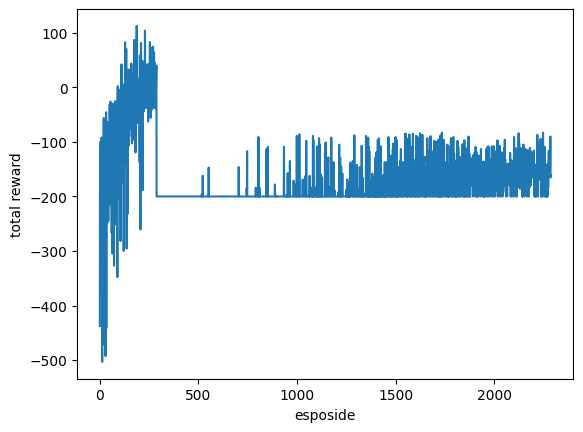

In [ ]:
#plot rewards
plt.plot(range(len(total_point_history)), total_point_history)
plt.xlabel('esposide')
plt.ylabel('total reward')


In [ ]:
#import utils
filename = "/content/drive/My Drive/Colab Notebooks/reinforcement_projects/Files/course code/jovyan/work/videos/lunar_lander_2000esposide.mp4"

create_video(filename, env, q_network)
play_video(filename)

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


## 4000 esposide

In [ ]:
getModel(4000)

In [ ]:
q_network.save('MountainCar_length4000.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0, 0.5, 'total reward')

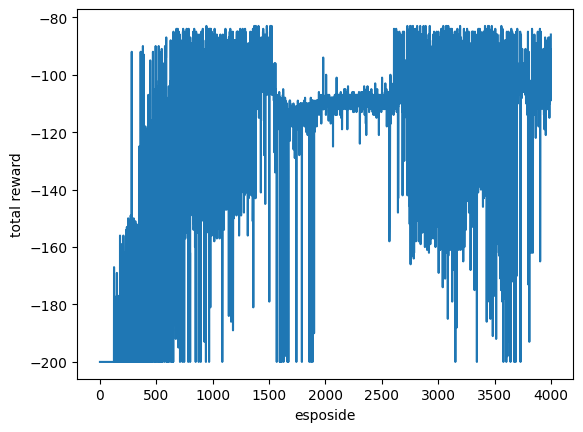

In [ ]:
#plot rewards
plt.plot(range(len(total_point_history)), total_point_history)
plt.xlabel('esposide')
plt.ylabel('total reward')


In [ ]:
filename = "/content/drive/My Drive/Colab Notebooks/reinforcement_projects/Files/course code/jovyan/work/videos/lunar_lander_4000esposide.mp4"
create_video(filename, env, q_network)
play_video(filename)